**Classification **

1. Check whether it is Binary or Multi-Class
2.- Logistic Regression
  - KNN
  - Decision Tree
  - SVM
  - XGBoost
3. Preprocessing ( Feature Engineering )
 - Normalization/Scaling
4. Train your model
5. Metrics - Evaluation
 - Accuracy Score
 - Confusion Matrix
 -  Classification Report ( Imbalanced Dataset)
 (Precision, Recall and F1 Score)


In [40]:
import pandas as pd
df = pd.read_csv('/content/Social_Network_Ads.csv')
df

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [41]:
# Output = Purchased
df['Purchased'].nunique()

2

In [42]:
# Counting unique values
c = df['Purchased'].value_counts()
c

0    257
1    143
Name: Purchased, dtype: int64

<BarContainer object of 2 artists>

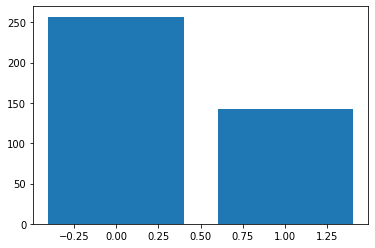

In [43]:
import matplotlib.pyplot as plt
plt.bar(c.index,c)

In [44]:
# Gender column is NON NUMERIC
# Encode it 
df['Gender'] = df['Gender'].astype('category').cat.codes
df

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]

In [45]:
# Input and Output
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)

(300, 3)
(100, 3)


In [47]:
import numpy as np
np.unique(y_test,return_counts=True)

(array([0, 1]), array([68, 32]))

In [56]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [57]:
x_train

array([[0.        , 0.61904762, 0.17777778],
       [1.        , 0.33333333, 0.77777778],
       [0.        , 0.47619048, 0.25925926],
       [0.        , 0.33333333, 0.88888889],
       [0.        , 0.80952381, 0.04444444],
       [0.        , 0.83333333, 0.65925926],
       [1.        , 0.5       , 0.2       ],
       [1.        , 0.47619048, 0.34074074],
       [0.        , 0.42857143, 0.25925926],
       [0.        , 0.42857143, 0.35555556],
       [0.        , 0.4047619 , 0.07407407],
       [1.        , 0.4047619 , 0.25925926],
       [1.        , 0.57142857, 0.42962963],
       [0.        , 0.69047619, 0.25185185],
       [0.        , 0.97619048, 0.1037037 ],
       [1.        , 0.73809524, 0.37037037],
       [0.        , 0.64285714, 0.85925926],
       [0.        , 0.30952381, 0.54814815],
       [0.        , 0.66666667, 0.4962963 ],
       [0.        , 0.69047619, 0.26666667],
       [1.        , 0.19047619, 0.        ],
       [1.        , 1.        , 0.64444444],
       [0.

In [58]:
# Building the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [60]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [61]:
# Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix(y_pred,y_test)
# Positive - 0
# Negative - 1

# True Positive
# True Negative
# False Postive
# False Negative

array([[67, 10],
       [ 1, 22]])

In [62]:
accuracy_score(y_pred,y_test)

0.89

In [63]:
# 11 out of 100 are wrong values
num = 67+22
den = 67+10+1+22
num/den

0.89

In [64]:
# Imbalanced Dataset
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92        77
           1       0.69      0.96      0.80        23

    accuracy                           0.89       100
   macro avg       0.84      0.91      0.86       100
weighted avg       0.92      0.89      0.90       100



In [65]:
import numpy as np
a = np.array([1,2,3,4,56,7,8,9])
# Applying normalization to scale with 0 and 1
min = a.min()
max = a.max()
a_norm = (a-min)/(max-min)
a_norm

array([0.        , 0.01818182, 0.03636364, 0.05454545, 1.        ,
       0.10909091, 0.12727273, 0.14545455])

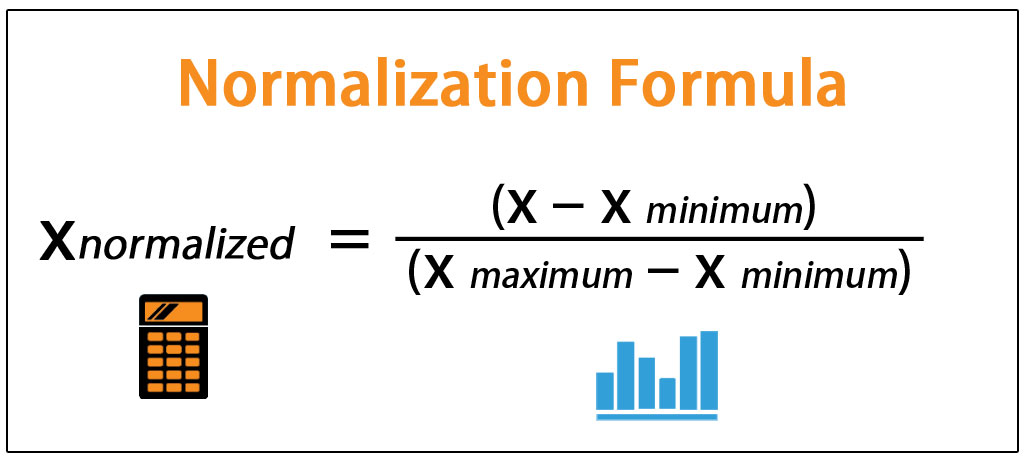

In [ ]:
# Apply Decision Tree Classifier for the same dataset.
# Check whether it works without Normalization